In [1]:
"""Assignment : Search for Treasure using the Best-First Search
 
Objective: Use Best-First Search to find a treasure in a grid.
 
Problem Statement: The treasure is hidden in a grid, and each cell has a heuristic value representing its "closeness" to the treasure. Implement Best-First Search to locate the treasure.
 
Tasks:
l. Use Manhattan distance as a heuristic.
lI. Implement the algorithm to always move to the most promising cell first (minimum heuristic value).
lII. Analyze how heuristic choice affects performance."""

'Assignment : Search for Treasure using the Best-First Search\n \nObjective: Use Best-First Search to find a treasure in a grid.\n \nProblem Statement: The treasure is hidden in a grid, and each cell has a heuristic value representing its "closeness" to the treasure. Implement Best-First Search to locate the treasure.\n \nTasks:\nl. Use Manhattan distance as a heuristic.\nlI. Implement the algorithm to always move to the most promising cell first (minimum heuristic value).\nlII. Analyze how heuristic choice affects performance.'

Treasure location: (7, 8)
Path to the treasure: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8)]
Time taken to find the path: 0.0 seconds


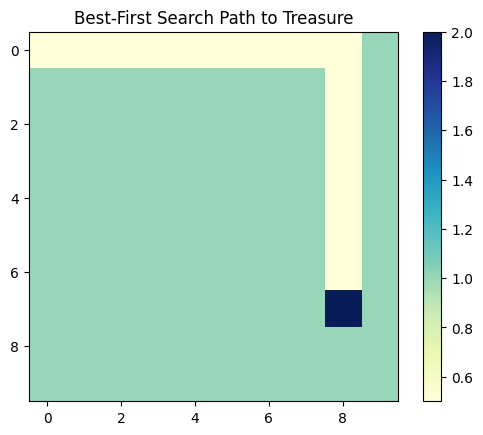

In [2]:
import heapq
import matplotlib.pyplot as plt
import numpy as np
import time

# Grid size and treasure location
GRID_SIZE = 10
TREASURE = (7, 8)  # Treasure is located at (7, 8)

# Manhattan distance heuristic
def manhattan_distance(cell, goal):
    return abs(cell[0] - goal[0]) + abs(cell[1] - goal[1])

# Best-First Search Algorithm
def best_first_search(start, goal):
    open_list = []
    heapq.heappush(open_list, (manhattan_distance(start, goal), start))
    came_from = {}
    
    while open_list:
        _, current = heapq.heappop(open_list)
        if current == goal:
            path = []
            while current != start:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path
        
        neighbors = [(current[0]-1, current[1]), (current[0]+1, current[1]),
                    (current[0], current[1]-1), (current[0], current[1]+1)]
        
        for neighbor in neighbors:
            if 0 <= neighbor[0] < GRID_SIZE and 0 <= neighbor[1] < GRID_SIZE:
                if neighbor not in came_from:
                    heapq.heappush(open_list, (manhattan_distance(neighbor, goal), neighbor))
                    came_from[neighbor] = current
    return []  # Return empty if no solution found

# Visualize the grid and the path
def visualize_grid(path):
    grid_image = np.zeros((GRID_SIZE, GRID_SIZE))
    
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            grid_image[i, j] = 1  # Mark all cells as open space
    
    for (x, y) in path:
        grid_image[x, y] = 0.5  # Mark path cells
    
    grid_image[TREASURE[0], TREASURE[1]] = 2  # Mark the treasure
    
    plt.imshow(grid_image, cmap="YlGnBu", interpolation="nearest")
    plt.colorbar()
    plt.title("Best-First Search Path to Treasure")
    plt.show()

# Function to analyze the performance of the heuristic
def analyze_performance(start, goal):
    start_time = time.time()
    path = best_first_search(start, goal)
    end_time = time.time()
    
    # Print path and time taken
    print("Treasure location:", goal)
    print("Path to the treasure:", path)
    print("Time taken to find the path:", end_time - start_time, "seconds")
    
    # Visualize the grid and path
    visualize_grid(path)

# Define the start position
start = (0, 0)  # Start at the top-left corner

# Perform Best-First Search to find the path to the treasure
analyze_performance(start, TREASURE)
